In [1]:
# Regression Assignment:  

#Step1: Read census Dataset to predict Scheduled_Caste_population and Percentage_SC_to_total
# importing required libraries

import csv
import numpy as np
import pandas as pd

#sklearn
from sklearn.datasets import make_classification

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve
from sklearn.metrics import accuracy_score

#for ploting graphs
from matplotlib import pyplot as plt
from matplotlib import rcParams

#from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the census dataset
census_data = pd.read_csv('CensusStatusSC01.csv') 

# shape of the datasets
print('Shape of census data :',census_data.shape) 

Shape of census data : (27, 20)


In [3]:
#data1.head()
census_data.head()

,SNo,State,District,Persons,Males,Females,Growth_1991_2001,Scheduled_Caste_population,Percentage_SC_to_total,Total_Educated,Graduate_and_Above,Total_workers,Non_Workers,Percentage_Non_Workers,Number_of_households,Scheduled_Tribe_population,Percentage_to_total_population_ST,Urbal_Area,Economical_Status,Below_Poverty_Line_Status
0,1,Telangana,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1747968,1743854,14.47,615219,17.62,1661089,81001,1711559,1780263,50.98,813797,90636,2.60,0,1,1
1,2,Telangana,"District Hyderabad (05), Andhra Pradesh (28)",3829753,1981173,1848580,17.18,289972,7.57,2634949,466744,1119842,2709911,70.76,695906,34560,0.90,1,0,0
2,3,Telangana,"District Warangal (09), Andhra Pradesh (28)",3246004,1644895,1601109,14.63,520024,16.02,1595745,99917,1566237,1679767,51.75,729110,457679,14.10,1,1,1
3,4,Andhra,"District Guntur (17), Andhra Pradesh (28)",4465144,2250279,2214865,7.27,808012,18.10,2455965,175832,2190299,2274845,50.95,1077303,208157,4.66,1,1,0
4,5,Andhra,"District Anantapur (22), Andhra Pradesh (28)",3640478,1859588,1780890,14.31,508531,13.97,1774088,102827,1777536,1862942,51.17,779052,127161,3.49,0,1,1


In [4]:
#Get summary of numerical fields by using describe() function
census_data.describe()

,SNo,Persons,Males,Females,Growth_1991_2001,Scheduled_Caste_population,Percentage_SC_to_total,Total_Educated,Graduate_and_Above,Total_workers,Non_Workers,Percentage_Non_Workers,Number_of_households,Scheduled_Tribe_population,Percentage_to_total_population_ST,Urbal_Area,Economical_Status,Below_Poverty_Line_Status
count,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000,2.700000e+01,27.000000,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000
mean,14.037037,1.877969e+06,9.712566e+05,9.067124e+05,23.908519,255860.555556,12.103333,1.022429e+06,83623.740741,7.581025e+05,1.119867e+06,59.300370,3.739597e+05,130734.000000,12.907037,0.444444,0.740741,0.703704
std,7.992696,1.349198e+06,6.906668e+05,6.599993e+05,11.979020,233844.455645,6.908223,7.763432e+05,104420.595498,6.055811e+05,7.906778e+05,7.080037,2.915641e+05,185641.963723,20.045902,0.506370,0.446576,0.465322
min,1.000000,3.892400e+04,2.184600e+04,1.707800e+04,7.270000,66.000000,0.010000,1.533700e+04,785.000000,2.172700e+04,1.719700e+04,44.180000,8.294000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.500000,7.044830e+05,3.649025e+05,3.395805e+05,15.980000,59724.500000,6.660000,3.118730e+05,13328.000000,2.937270e+05,4.444185e+05,52.880000,1.414785e+05,8714.500000,0.860000,0.000000,0.500000,0.000000
50%,14.000000,1.583225e+06,8.151520e+05,7.680730e+05,22.350000,202654.000000,12.840000,8.838600e+05,48484.000000,6.055990e+05,9.776260e+05,61.090000,3.031070e+05,51753.000000,3.490000,0.000000,1.000000,1.000000
75%,20.500000,2.970164e+06,1.586264e+06,1.399988e+06,28.290000,404989.500000,17.860000,1.628417e+06,101372.000000,1.078470e+06,1.821602e+06,63.820000,5.974890e+05,181563.000000,14.725000,1.000000,1.000000,1.000000
max,27.000000,4.465144e+06,2.250279e+06,2.214865e+06,60.120000,808012.000000,22.550000,2.634949e+06,466744.000000,2.190299e+06,2.709911e+06,71.780000,1.077303e+06,859574.000000,74.990000,1.000000,1.000000,1.000000


In [5]:
# 2. Data preprocessing /Data Cleasing: 

#1. Check missing values in the dataset:

census_data.apply(lambda x: sum(x.isnull()),axis=0) 

SNo                                  0
State                                0
District                             0
Persons                              0
Males                                0
Females                              0
Growth_1991_2001                     0
Scheduled_Caste_population           0
Percentage_SC_to_total               0
Total_Educated                       0
Graduate_and_Above                   0
Total_workers                        0
Non_Workers                          0
Percentage_Non_Workers               0
Number_of_households                 0
Scheduled_Tribe_population           0
Percentage_to_total_population_ST    0
Urbal_Area                           0
Economical_Status                    0
Below_Poverty_Line_Status            0
dtype: int64

In [6]:
# Eliminate unused columns and use only required - dataframe 

df = pd.DataFrame(census_data)

print(df)

    SNo             State                                       District  \
0     1         Telangana  District Karimnagar (03), Andhra Pradesh (28)   
1     2         Telangana   District Hyderabad (05), Andhra Pradesh (28)   
2     3         Telangana    District Warangal (09), Andhra Pradesh (28)   
3     4            Andhra      District Guntur (17), Andhra Pradesh (28)   
4     5            Andhra   District Anantapur (22), Andhra Pradesh (28)   
5     6  ArunachalPradesh   District Tawang (01), Arunachal Pradesh (12)   
6     7             Assam            District Kokrajhar (01), Assam (18)   
7     8             Bihar   District Pashchim Champaran (01), Bihar (10)   
8     9                CG      District Koriya * (01), Chhattisgarh (22)   
9    10        Chandigarh      District Chandigarh (01), Chandigarh (04)   
10   11             Delhi                            District North West   
11   12               Goa                             District North Goa   
12   13     

In [7]:
#2. Eliminate unused columns and use only required in the data frame 
df = df.drop(columns=['SNo','State','District','Males', 'Females'],axis=0)
print(df)

    Persons  Growth_1991_2001  Scheduled_Caste_population  \
0   3491822             14.47                      615219   
1   3829753             17.18                      289972   
2   3246004             14.63                      520024   
3   4465144              7.27                      808012   
4   3640478             14.31                      508531   
5     38924             22.69                         101   
6    905764             15.05                       23018   
7   3043466             30.40                      380930   
8    586327             16.91                       39229   
9    900635             40.33                      125145   
10  2860869             60.12                      367454   
11   758573             13.93                       16243   
12  1583225             20.90                      164000   
13   468411             51.16                       59428   
14   460887             17.09                       60021   
15  1035464             

In [8]:
#4. fill all the missing values in the dataset  if any as below:
df['Scheduled_Caste_population'].fillna(df['Scheduled_Caste_population'].mode()[0], inplace=True)
df['Percentage_SC_to_total'].fillna(df['Percentage_SC_to_total'].mode()[0], inplace=True)

In [9]:
#3. re-Check missing values in the dataframe:
df.apply(lambda x: sum(x.isnull()),axis=0) 


Persons                              0
Growth_1991_2001                     0
Scheduled_Caste_population           0
Percentage_SC_to_total               0
Total_Educated                       0
Graduate_and_Above                   0
Total_workers                        0
Non_Workers                          0
Percentage_Non_Workers               0
Number_of_households                 0
Scheduled_Tribe_population           0
Percentage_to_total_population_ST    0
Urbal_Area                           0
Economical_Status                    0
Below_Poverty_Line_Status            0
dtype: int64

In [10]:
#Distribution analysis:
# we can look at frequency distribution for non numeric values like State
#Growth-1991-2001, Percentage_SC_to_total, Percentage_Non_Workers, Percentage_to_total_population_ST

Text(0.5, 1.0, 'SC Percentage by State')

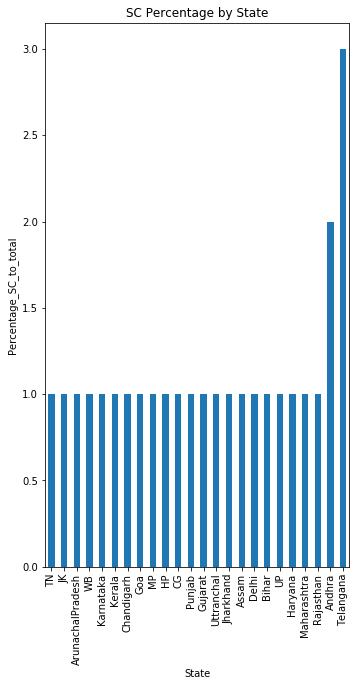

In [11]:
#Percentage of SC population by State:

temp1 = census_data['Percentage_SC_to_total'].value_counts(ascending=True)
temp2 = census_data['State'].value_counts(ascending=True)

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(122)
ax1.set_xlabel('State')
ax1.set_ylabel('Percentage_SC_to_total')
ax1.set_title('SC percentage by State')
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('State')
ax2.set_ylabel('Percentage_SC_to_total')
ax2.set_title('SC Percentage by State')

In [12]:
#Categorical variable analysis: 
# Note: here Economical status has been coded as 1 for Yes (Poor) and 0 for No (Not Poor). 

temp1 = df['Economical_Status'].value_counts(ascending=True)
temp2 = df.pivot_table(
        values='Scheduled_Caste_population',
        index='Economical_Status',
        aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Scheduled_Caste_population :') 
print (temp1)

Frequency Table for Scheduled_Caste_population :
0     7
1    20
Name: Economical_Status, dtype: int64


In [13]:
#4. Building a Predictive Model in Python	  Linear Regression Model 

# seperate the indepndent and target variable on training data
# Now, we need to predict the missing target variable in the test data
# target variable - Percentage_SC_to_total

#Standard processing and Training/Test set Split
#GPercentage_SC_to_total 
x = df.loc[:, df.columns != "Percentage_SC_to_total"]
y = df.loc[:, "Percentage_SC_to_total"]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=7)


In [14]:
#5A. Generic function for making a classification model and accessing performance:

def Regression_model(model, df, predictors, outcome):

    #Fit the model:
    model.fit(df[predictors],df[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(df[predictors])
    print('predictions data :', predictions) 
    
    #Fit the model again so that it can be refered outside the function:
    model.fit(df[predictors],df[outcome])  

    #Print accuracy

In [15]:
#Linear Regression
#Let’s make our first Linear Regression model. 
#One way would be to take all the variables into the model but this might result in ove

outcome_var = 'Percentage_SC_to_total'
model = LinearRegression()
predictor_var = ['Scheduled_Caste_population']

Regression_model(model, df, predictor_var, outcome_var)


predictions data : [19.084776   12.76603404 17.23537342 22.83026549 17.01209296  7.13455995
  7.57978038 14.53312222  7.89471987  9.56385452 14.27131699  7.44815894
 10.31871073  8.28713631  8.29865683 11.08481548  7.13387998 12.561132
  8.37046094  7.8779345   8.74055516 15.03060268 14.97047451 18.33434926
 19.03770313  8.31987168 11.06966201]


In [16]:
#RandomForestRegressor
outcome_var = 'Percentage_SC_to_total'
model = RandomForestRegressor()
predictor_var = ['Scheduled_Caste_population']

Regression_model(model, df, predictor_var, outcome_var)


predictions data : [17.779  8.003 14.995 17.447 14.38   0.348  2.42  13.296  5.936 13.874
 13.456  2.3   10.937 12.016 12.148 17.309  0.273  7.932  6.833  3.297
 14.433 17.926 18.895 19.434 18.838 18.407 14.485]


In [17]:
#RandomForestRegressor
outcome_var = 'Percentage_SC_to_total'
model = RandomForestRegressor(n_estimators=20, oob_score=True, n_jobs=-1, random_state=101,
                               max_features = 0.50, min_samples_leaf = 5)
predictor_var = ['Scheduled_Caste_population']

Regression_model(model, df, predictor_var, outcome_var)

predictions data : [18.18982103 12.37235599 18.18982103 18.18982103 18.11540833  5.58074271
  5.58074271 14.75769383  5.58074271 11.09679426 14.41227796  5.58074271
 11.42250335  6.816614    7.158864   12.37235599  5.58074271 12.37235599
  7.56803066  5.58074271 10.3063645  18.11540833 18.11540833 18.18982103
 18.18982103  7.56803066 11.92857677]


In [18]:
##GradientBoostingRegressor
outcome_var = 'Percentage_SC_to_total'
model = GradientBoostingRegressor()
predictor_var = ['Scheduled_Caste_population']

Regression_model(model, df, predictor_var, outcome_var)

predictions data : [17.72627033  7.75865536 15.95313536 18.17181122 14.25426184  0.30999931
  2.57783699 12.66357734  6.72134397 13.82244412 12.66357734  2.18196458
 10.69907072 12.66807369 13.06761066 19.3569298   0.07619548  6.92150921
  5.48991101  2.95512498 14.40212031 19.28036435 22.17273128 20.81810604
 20.99959106 20.34367352 12.73411015]


In [19]:
#AdaBoostRegressor
outcome_var = 'Percentage_SC_to_total'
model = AdaBoostRegressor()
predictor_var = ['Scheduled_Caste_population']

Regression_model(model, df, predictor_var, outcome_var)

predictions data : [18.7875      9.3        18.26333333 18.7875     18.26333333  2.54
  2.92       12.84        6.69       12.18642857 12.84        2.54
 12.18642857 14.19333333 14.19333333 14.89875     2.54        9.3
 10.92        2.92       12.18642857 18.7875     22.55       18.7875
 18.7875     14.19333333 13.024     ]


In [20]:
#RandomForestRegressor
outcome_var = 'Percentage_SC_to_total'
model = RandomForestRegressor(n_estimators=20, oob_score=True, n_jobs=-1, random_state=101,
                               max_features = 0.50, min_samples_leaf = 5)
predictor_var = ['Scheduled_Caste_population']

Regression_model(model, df, predictor_var, outcome_var)

predictions data : [18.18982103 12.37235599 18.18982103 18.18982103 18.11540833  5.58074271
  5.58074271 14.75769383  5.58074271 11.09679426 14.41227796  5.58074271
 11.42250335  6.816614    7.158864   12.37235599  5.58074271 12.37235599
  7.56803066  5.58074271 10.3063645  18.11540833 18.11540833 18.18982103
 18.18982103  7.56803066 11.92857677]


In [21]:
outcome_var = 'Scheduled_Caste_population'
model = LinearRegression()
predictor_var = ['Percentage_SC_to_total']

Regression_model(model, df, predictor_var, outcome_var)


predictions data : [378665.40379286 154945.39325783 343048.28768778 389350.53862439
 297413.85767815  -7780.30594726  42974.08450248 265135.84620792
 135355.97940003 295855.60884855 272259.26942894  34069.80547621
 217052.73946606 268920.16479409 276266.19499076 423854.61985118
 -13345.48033868 134020.33754609 104191.00280809  51433.14957744
 315667.629682   416508.58965451 488410.64279164 452348.31273525
 457245.6661997  447673.56624646 266694.09503752]


In [22]:
outcome_var = 'Scheduled_Caste_population'
model = LinearRegression()
predictor_var = ['Persons','Growth_1991_2001','Scheduled_Caste_population','Total_Educated','Total_workers',
                 'Non_Workers','Percentage_Non_Workers','Scheduled_Tribe_population']

Regression_model(model, df, predictor_var, outcome_var)

predictions data : [6.15219e+05 2.89972e+05 5.20024e+05 8.08012e+05 5.08531e+05 1.01000e+02
 2.30180e+04 3.80930e+05 3.92290e+04 1.25145e+05 3.67454e+05 1.62430e+04
 1.64000e+05 5.94280e+04 6.00210e+04 2.03434e+05 6.60000e+01 2.79425e+05
 6.37170e+04 3.83650e+04 8.27670e+04 4.06537e+05 4.03442e+05 5.76592e+05
 6.12796e+05 6.11130e+04 2.02654e+05]


In [23]:
outcome_var = 'Scheduled_Caste_population'
model = RandomForestRegressor()
predictor_var = ['Percentage_SC_to_total']

Regression_model(model, df, predictor_var, outcome_var)


predictions data : [6.136301e+05 1.896748e+05 3.888469e+05 7.100266e+05 5.085310e+05
 9.400000e+01 2.090600e+04 2.631468e+05 6.430330e+04 3.168380e+05
 2.750462e+05 1.751850e+04 2.186218e+05 8.807320e+04 1.215076e+05
 2.504484e+05 7.300000e+01 2.084209e+05 1.259806e+05 3.340640e+04
 2.104962e+05 4.259011e+05 5.636844e+05 5.322849e+05 6.055552e+05
 3.260933e+05 2.096640e+05]


In [24]:
outcome_var = 'Scheduled_Caste_population'
model = RandomForestRegressor()
predictor_var = ['Persons','Growth_1991_2001','Scheduled_Caste_population','Total_Educated','Total_workers',
                 'Non_Workers','Percentage_Non_Workers','Scheduled_Tribe_population']

Regression_model(model, df, predictor_var, outcome_var)

predictions data : [596582.5 336927.  545779.4 748115.8 513245.8  29705.   25984.9 383046.7
  43589.4 126403.6 382777.7  23062.4 191887.6  79370.9  64510.9 195605.1
  29001.6 324684.6  99165.6  38015.7  78528.1 406227.5 403751.5 556091.3
 574502.8  69185.5 239024.2]


In [25]:
#RandomForestRegressor
outcome_var = 'Scheduled_Caste_population'
model = RandomForestRegressor(n_estimators=20, oob_score=True, n_jobs=-1, random_state=101,
                               max_features = 0.50, min_samples_leaf = 5)
predictor_var = ['Scheduled_Caste_population']

Regression_model(model, df, predictor_var, outcome_var)

predictions data : [510168.66657981 289656.36999702 510168.66657981 510168.66657981
 510168.66657981  59525.12667985  59525.12667985 487842.86550838
  59525.12667985 119437.67007631 487842.86550838  59525.12667985
 119437.67007631  62437.26279096  62437.26279096 138957.49924298
  59525.12667985 249500.48404464  71038.35225524  59525.12667985
 102554.51837177 498708.23175838 487842.86550838 510168.66657981
 510168.66657981  66477.30654096 138957.49924298]


In [26]:
#RandomForestRegressor
outcome_var = 'Scheduled_Caste_population'
model = RandomForestRegressor(n_estimators=20, oob_score=True, n_jobs=-1, random_state=101,
                               max_features = 0.50, min_samples_leaf = 5)
predictor_var = ['Persons','Growth_1991_2001','Scheduled_Caste_population','Total_Educated','Total_workers',
                 'Non_Workers','Percentage_Non_Workers','Scheduled_Tribe_population']

Regression_model(model, df, predictor_var, outcome_var)

predictions data : [500686.66967047 408595.15009074 500686.66967047 500686.66967047
 500686.66967047  60070.17284348  78014.32633554 476039.18752761
  60070.17284348  99732.53927815 476039.18752761  63079.00409348
 103534.70100434  70241.01619665  62982.30895459 107533.68761149
  67328.88008554 421782.19741217 110190.94534958  89418.73800831
  66981.29556173 432528.91063367 422200.6809367  487499.62234904
 487499.62234904  62982.30895459 180546.06247163]


In [27]:
#GradientBoostingRegressor
outcome_var = 'Scheduled_Caste_population'
model = GradientBoostingRegressor()
predictor_var = ['Scheduled_Caste_population']

Regression_model(model, df, predictor_var, outcome_var)

predictions data : [6.15205876e+05 2.89970380e+05 5.20016545e+05 8.07992980e+05
 5.08524335e+05 1.14520699e+02 2.30259251e+04 3.80926914e+05
 3.92345981e+04 1.25172645e+05 3.67451920e+05 1.62529228e+04
 1.63999006e+05 5.94330107e+04 6.00250669e+04 2.03433834e+05
 8.61527482e+01 2.79424446e+05 6.37187022e+04 3.83718825e+04
 8.27437313e+04 4.06532367e+05 4.03438284e+05 5.76583600e+05
 6.12785049e+05 6.11156840e+04 2.02654622e+05]


In [28]:
#RandomForestRegressor
outcome_var = 'Scheduled_Caste_population'
model = AdaBoostRegressor()
predictor_var = ['Scheduled_Caste_population']

Regression_model(model, df, predictor_var, outcome_var)

predictions data : [601535.66666667 284698.5        514277.5        808012.
 510829.6         16243.          20438.33333333 386221.75
  49618.71428571 125145.         386221.75        16243.
 172993.76923077  60945.          60945.         190289.33333333
  16243.         284698.5         60998.          49618.71428571
  71259.         395992.5        395992.5        586248.75
 601535.66666667  60945.         190289.33333333]
